In [1]:
# Basic
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read CSV
df = pd.read_csv('fake_job_postings.csv')

In [3]:
# Drop rows jahan description missing ho
df = df.dropna(subset=['description'])

# Fill nulls
df['employment_type'] = df['employment_type'].fillna('Unknown')
df['industry'] = df['industry'].fillna('Unknown')


In [4]:
# Input and output
X = df[['description', 'employment_type', 'industry', 'telecommuting', 'has_company_logo', 'has_questions']]
y = df['fraudulent']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
text_cols = ['description']
cat_cols = ['employment_type', 'industry']
num_cols = ['telecommuting', 'has_company_logo', 'has_questions']


In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(stop_words='english', max_features=5000), 'description'),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

In [7]:
# Model pipeline
lr_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))  # Increase max_iter if convergence warning
])


In [8]:
# Train
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(max_features=5000,
                                                                  stop_words='english'),
                                                  'description'),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['employment_type',
                                                   'industry']),
                                                 ('num', 'passthrough',
                                                  ['telecommuting',
                                                   'has_company_logo',
                                                   'has_questions'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [9]:
lr_pipeline.score(X_train,y_train)*100, lr_pipeline.score(X_test,y_test)*100

(95.93092358246523, 93.98769574944072)

In [10]:
# Predict
lr_preds = lr_pipeline.predict(X_test)


In [11]:
print("Accuracy:", accuracy_score(y_test, lr_preds))

Accuracy: 0.9398769574944071


In [12]:
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))

Confusion Matrix:
 [[3203  191]
 [  24  158]]


In [13]:
print("Classification Report:\n", classification_report(y_test, lr_preds))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97      3394
           1       0.45      0.87      0.60       182

    accuracy                           0.94      3576
   macro avg       0.72      0.91      0.78      3576
weighted avg       0.97      0.94      0.95      3576



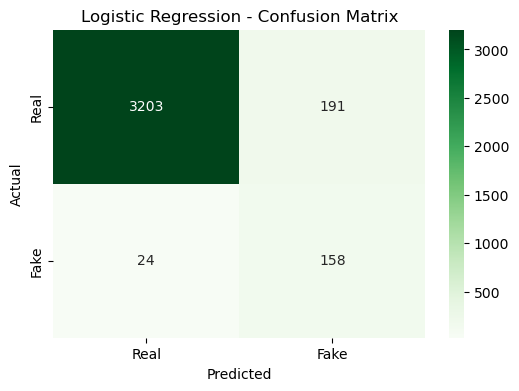

In [18]:
cm = confusion_matrix(y_test, lr_preds)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.savefig('LR_confusion_Matrix.png', dpi=300)
plt.show()


In [17]:
import pickle

with open('fake_job_model.pkl', 'wb') as f:
    pickle.dump(lr_pipeline, f)
